In [1]:
#Now here we mount the drive.

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Now here we import the kaggle library.

!pip install -q kaggle

In [3]:
#Now here we connect the kaggle with the collab.

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
#Now here we download the dataset.

!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 92% 136M/149M [00:01<00:00, 103MB/s]
100% 149M/149M [00:01<00:00, 113MB/s]


In [5]:
#Now here we unzip the dataset.

!unzip brain-tumor-mri-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

In [6]:
#Now here we import the important libraries.

#Linear Algebra.
import numpy as np

#Data preprocessing(read .csv and other i/o files).
import pandas as pd

#Data Visualization.
import matplotlib.pyplot as plt

#Statistical Visualization.
import seaborn as sns

#Operating system.
import os

#Opencv.
import cv2

#Tensorflow(acts as backend).
import tensorflow as tf

#keras image preprocessing.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Keras model.
from tensorflow.keras.models import Sequential

#Other features of models.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

#Optimizer of model.
from tensorflow.keras.optimizers import Adam

#callbacks of keras.
from tensorflow.keras.callbacks import EarlyStopping

#Data Splitting.
from sklearn.model_selection import train_test_split

#Model statistics.
from sklearn.metrics import confusion_matrix, classification_report

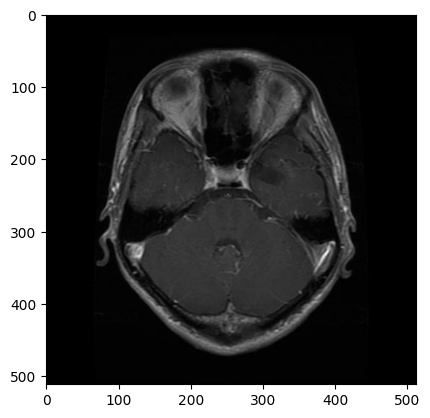

In [7]:
#Now here we check one of the immages of test and train.

img_path_training=r"/content/Training/meningioma/Tr-meTr_0000.jpg"

img_path_testing=r"/content/Testing/glioma/Te-glTr_0001.jpg"

img1=cv2.imread(img_path_training)

img2=cv2.imread(img_path_testing)

plt.imshow(img1)

plt.imshow(img2)

In [8]:
#Now here we use the imagedatagenerator for rescaling purpose.

train_datagen=ImageDataGenerator(rescale=1./255)

test_datagen=ImageDataGenerator(rescale=1./255)

In [9]:
#Now here we create train and test dataset.

train_dataset=train_datagen.flow_from_directory(
    directory=r"/content/Training",
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical"
)

validation_dataset=test_datagen.flow_from_directory(
    directory=r"/content/Testing",
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical"
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [10]:
#Now here we check the classes of train dataset.

train_dataset.class_indices

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [11]:
#Now here we create the cnn model.

model=Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(224,224,3))),

model.add(MaxPooling2D(pool_size=(2,2))),

model.add(Conv2D(64, kernel_size=(3,3), activation="relu")),

model.add(MaxPooling2D(pool_size=(2,2))),

model.add(Conv2D(128, kernel_size=(3,3), activation="relu")),

model.add(MaxPooling2D(pool_size=(2,2))),

model.add(Conv2D(128, kernel_size=(3,3), activation="relu")),

model.add(MaxPooling2D(pool_size=(2,2))),

model.add(Flatten()),

model.add(Dense(128, activation="relu")),

model.add(Dropout(0.5)),

model.add(Dense(4, activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
#now here we check the summary of model.

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,359,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,600,772 (9.92 MB)

 Trainable params: 2,600,772 (9.92 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
#Now here we compile the model.

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [16]:
#Here we find steps per epoch.

steps_per_epoch = len(train_dataset) // 32

In [18]:
#Now here we train the model.

history=model.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    epochs=20,
    validation_data=validation_dataset,
    validation_steps=steps_per_epoch
)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step - accuracy: 0.7516 - loss: 0.5742 - val_accuracy: 0.7375 - val_loss: 0.6204
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.8221 - loss: 0.4815 - val_accuracy: 0.7250 - val_loss: 0.5779
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - accuracy: 0.8465 - loss: 0.4031 - val_accuracy: 0.6875 - val_loss: 0.9434
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.7690 - loss: 0.6602 - val_accuracy: 0.7688 - val_loss: 0.5622
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.8158 - loss: 0.5454 - val_accuracy: 0.7125 - val_loss: 0.6658
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.8058 - loss: 0.5251 - val_accuracy: 0.8062 - val_loss: 0.5299
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 0.7340 - loss: 0.6161 - val_accuracy: 0.7812 - val_loss: 0.5499
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 202ms/step - accuracy: 0.7937 - loss: 0.5368 - val_accuracy: 0.7875 - val_loss:

In [19]:
#Now here we test the image using this model.

model.evaluate(validation_dataset)

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.7595 - loss: 0.6123


[0.5883984565734863, 0.768878698348999]

In [23]:
#Now here we preprocess the image before passing to model for prediction.

test_img_path=r"/content/Testing/notumor/Te-noTr_0002.jpg"

img_test=cv2.imread(test_img_path)

img_test=cv2.resize(img_test, (224,224))

img_test=img_test.reshape(1,224,224,3)

img_test=img_test/255.0

img_test.shape

(1, 224, 224, 3)

In [24]:
#Now here we pass the image to model.

prediction=model.predict(img_test)

print(np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2


In [25]:
#Now here we save the model.

model.save("brain_tumor_model.h5")